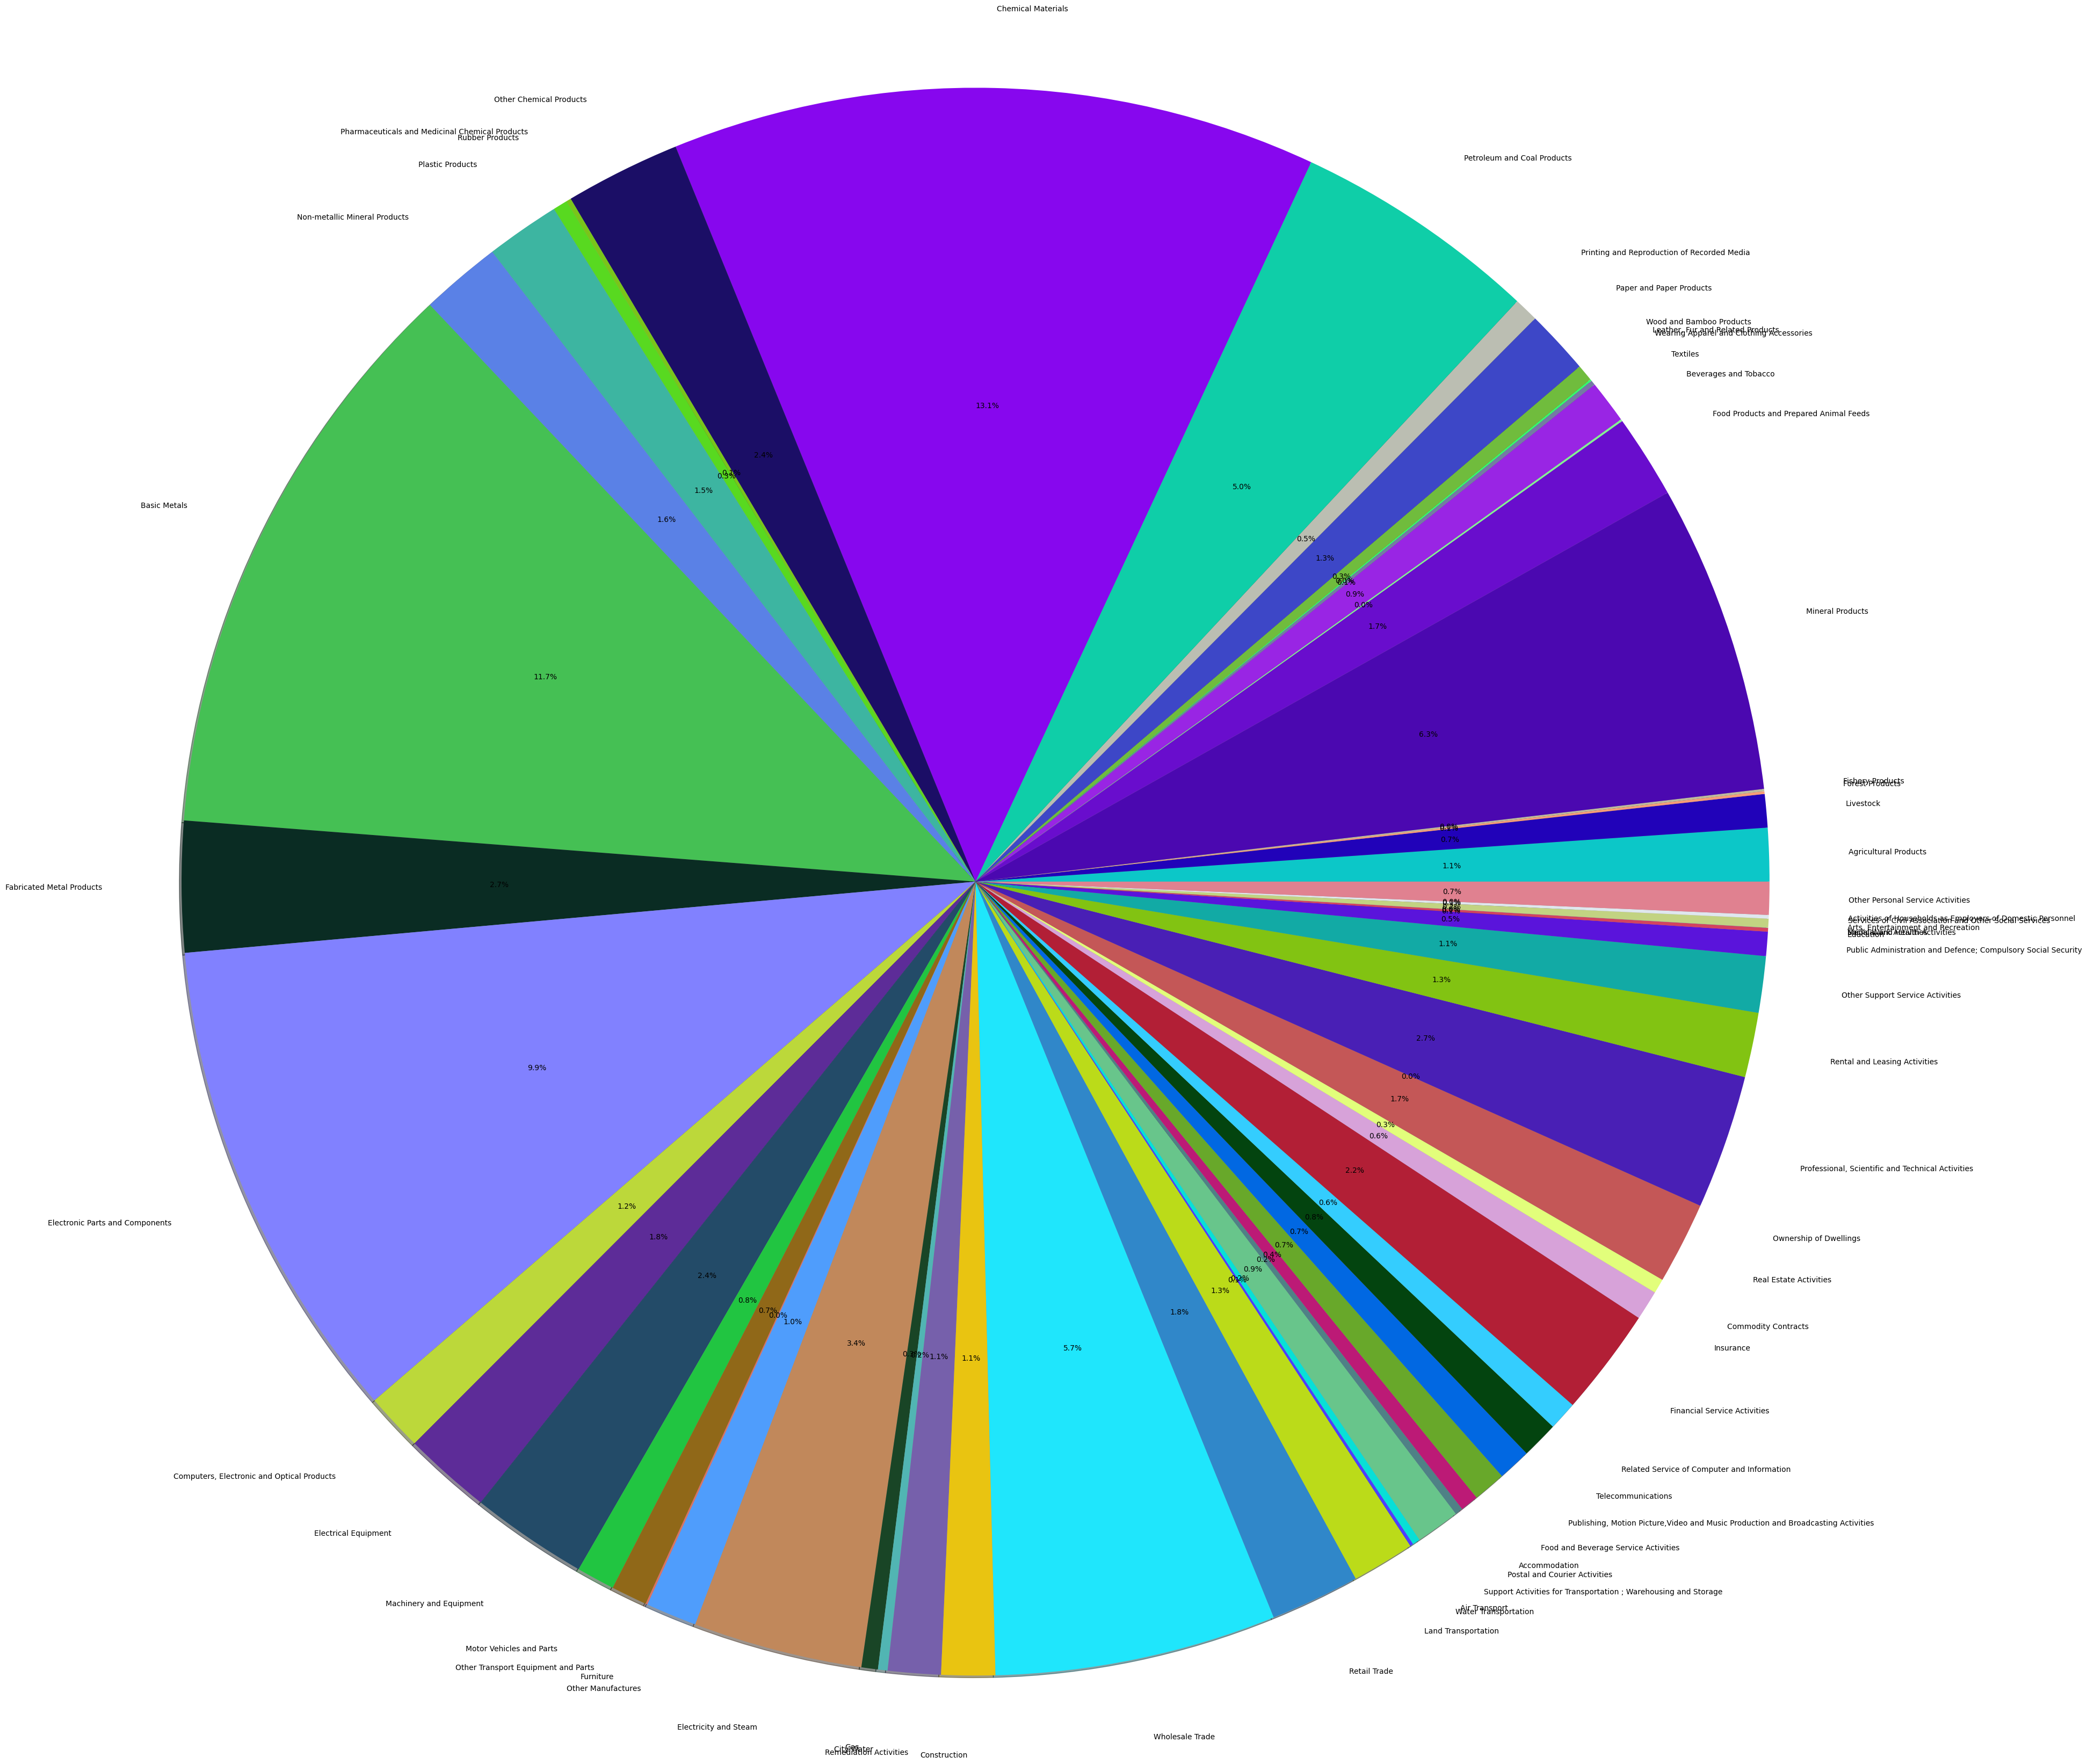

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
from openpyxl import load_workbook
from openpyxl import Workbook
import random

def random_color(amount):
    return "#{}{}{}{}{}{}".format(*(random.choice("0123456789abcdef") for i in range(amount)))

def flatten(input):
    new_list = []
    for i in input:
        new_list.append(i[0])
    return new_list

def logic_rows(x , n):
    if x >= n + 2 or x == 0:
        return True
    return False

def plot_pie_diagram(parameters , output):
    plt.figure()
    colors = [random_color(len(output)) for i in range(len(output))]
    plt.pie(output, labels = parameters, colors = colors, 
        startangle = 0, shadow = True,
        radius = 10, autopct = '%1.1f%%')
    plt.show()
    
amount_of_sectors = int(input("Enter number of sectors: "))
amount_of_primary_inputs = int(input("Enter number of primary inputs: "))
path = r'/Users/t.voitekh/Desktop/Linear/Economy2_technology.xlsx'
#r'/Users/t.voitekh/Desktop/Linear/Taiwan_technology.xls'
names = pd.read_excel(path, skiprows = lambda x: x > 1 , usecols = lambda y: y != "Unnamed: 0" and y != "Unnamed: 1")
sectors = names.values.tolist()[0]
sectors.pop(len(sectors) - 1)
tech = pd.read_excel(path , skiprows = lambda x : logic_rows(x , amount_of_sectors) , usecols = lambda y: y != "Unnamed: 0" and y != "Unnamed: 1" and y != "Demand")
tech_matrix = tech.values.tolist()
primary_inputs = pd.read_excel(path , skiprows = lambda x : x <= amount_of_sectors + 1 or x >= amount_of_sectors + amount_of_primary_inputs + 3)
primary_inputs = primary_inputs.values.tolist()
primary_input_demand = []
for i in range (amount_of_primary_inputs):
    for j in range (2):
        del primary_inputs[i][0]
    del primary_inputs[i][amount_of_sectors]
final_demand = pd.read_excel(path , skiprows = lambda x : logic_rows(x , amount_of_sectors) , usecols = lambda y: y == "Demand")
final_demand = flatten(final_demand.values.tolist())
output = np.matmul(np.linalg.inv(np.identity(amount_of_sectors) - tech_matrix) , final_demand)
primary_output = np.matmul(primary_inputs, output)
Sectors_output = []
Primary_output = []
Sectors_output.append("Total produced output")
Primary_output.append("Total required cost of primary inputs")
for i in output:
    Sectors_output.append(i)
for i in primary_output:
    Primary_output.append(i)
plot_pie_diagram(sectors , output)
wb = load_workbook(filename = path)
sheet = wb.active
sheet.append(Sectors_output)
sheet.append(Primary_output)
wb.save('/Users/t.voitekh/Desktop/Linear/Output_result.xlsx')
    